# Basic FIS - Modify to achieve the required outcomes

In [ ]:
pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

"""# keep the input & output labels unchanged """
waitingTraffic  = ctrl.Antecedent(np.arange(1, 100, 1), 'waiting')
incomingTraffic = ctrl.Antecedent(np.arange(0, 100, 1), 'incoming')

waitingDuration = ctrl.Consequent(np.arange(0, 120, 1), 'wait duration')
openDuration    = ctrl.Consequent(np.arange(0, 120, 1), 'open duration')

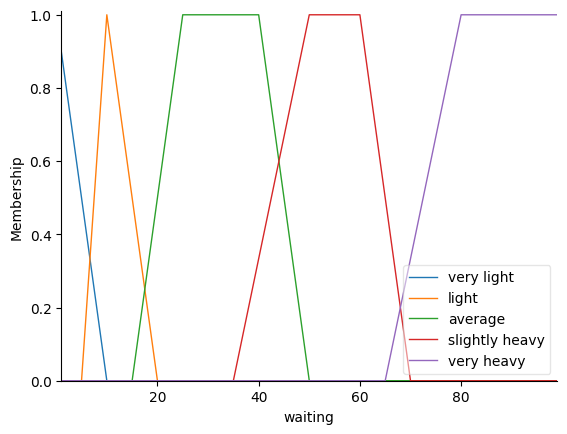

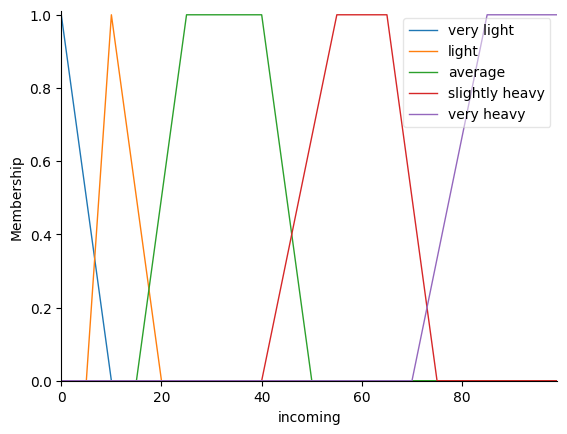

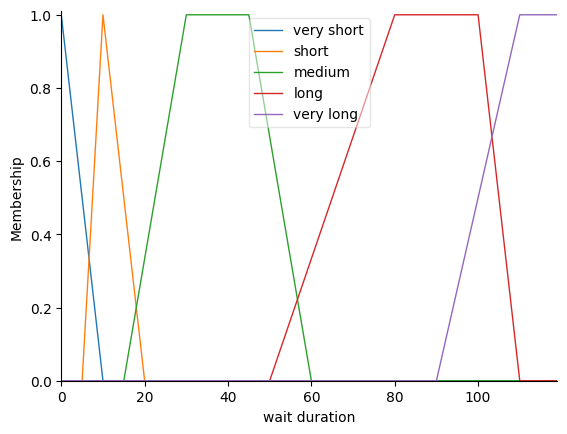

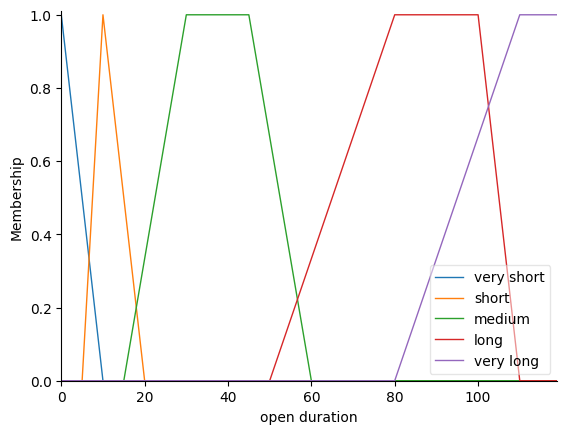

In [ ]:
waitingTraffic['very light'] = fuzz.trimf(waitingTraffic.universe, [0, 0, 10])
waitingTraffic['light'] = fuzz.trimf(waitingTraffic.universe, [5, 10, 20])
waitingTraffic['average'] = fuzz.trapmf(waitingTraffic.universe, [15, 25, 40, 50])
waitingTraffic['slightly heavy'] = fuzz.trapmf(waitingTraffic.universe, [35, 50, 60, 70])
waitingTraffic['very heavy'] = fuzz.trapmf(waitingTraffic.universe, [65, 80, 100, 100])

incomingTraffic['very light'] = fuzz.trimf(incomingTraffic.universe, [0, 0, 10])
incomingTraffic['light'] = fuzz.trimf(incomingTraffic.universe, [5, 10, 20])
incomingTraffic['average'] = fuzz.trapmf(incomingTraffic.universe, [15, 25, 40, 50])
incomingTraffic['slightly heavy'] = fuzz.trapmf(incomingTraffic.universe, [40, 55, 65, 75])
incomingTraffic['very heavy'] = fuzz.trapmf(incomingTraffic.universe, [70, 85, 100, 100])

waitingTraffic.view()
incomingTraffic.view()

waitingDuration['very short'] = fuzz.trimf(waitingDuration.universe, [0, 0, 10])
waitingDuration['short'] = fuzz.trimf(waitingDuration.universe, [5, 10, 20])
waitingDuration['medium'] = fuzz.trapmf(waitingDuration.universe, [15, 30, 45, 60])
waitingDuration['long'] = fuzz.trapmf(waitingDuration.universe, [50, 80, 100, 110])
waitingDuration['very long'] = fuzz.trapmf(waitingDuration.universe, [90, 110, 120, 120])

openDuration['very short'] = fuzz.trimf(openDuration.universe, [0, 0, 10])
openDuration['short'] = fuzz.trimf(openDuration.universe, [5, 10, 20])
openDuration['medium'] = fuzz.trapmf(openDuration.universe, [15, 30, 45, 60])
openDuration['long'] = fuzz.trapmf(openDuration.universe, [50, 80, 100, 110])
openDuration['very long'] = fuzz.trapmf(openDuration.universe, [80, 110, 120, 120])

waitingDuration.view()
openDuration.view()

In [ ]:
# Very Light Incoming Traffic
rule1 = ctrl.Rule(incomingTraffic['very light'] & waitingTraffic['very light'], [waitingDuration['long'], openDuration['very short']])
rule2 = ctrl.Rule(incomingTraffic['very light'] & waitingTraffic['light'], [waitingDuration['long'], openDuration['very short']])
rule3 = ctrl.Rule(incomingTraffic['very light'] & waitingTraffic['average'], [waitingDuration['very long'], openDuration['short']])
rule4 = ctrl.Rule(incomingTraffic['very light'] & waitingTraffic['slightly heavy'], [waitingDuration['very long'], openDuration['short']])
rule5 = ctrl.Rule(incomingTraffic['very light'] & waitingTraffic['very heavy'], [waitingDuration['very long'], openDuration['short']])

# Light Incoming Traffic
rule6 = ctrl.Rule(incomingTraffic['light'] & waitingTraffic['very light'], [waitingDuration['long'], openDuration['very short']])
rule7 = ctrl.Rule(incomingTraffic['light'] & waitingTraffic['light'], [waitingDuration['long'], openDuration['very short']])
rule8 = ctrl.Rule(incomingTraffic['light'] & waitingTraffic['average'], [waitingDuration['very long'], openDuration['short']])
rule9 = ctrl.Rule(incomingTraffic['light'] & waitingTraffic['slightly heavy'], [waitingDuration['very long'], openDuration['short']])
rule10 = ctrl.Rule(incomingTraffic['light'] & waitingTraffic['very heavy'], [waitingDuration['very long'], openDuration['short']])

# Average Incoming Traffic
rule11 = ctrl.Rule(incomingTraffic['average'] & waitingTraffic['very light'], [waitingDuration['very long'], openDuration['very short']])
rule12 = ctrl.Rule(incomingTraffic['average'] & waitingTraffic['light'], [waitingDuration['very long'], openDuration['very short']])
rule13 = ctrl.Rule(incomingTraffic['average'] & waitingTraffic['average'], [waitingDuration['long'], openDuration['short']])
rule14 = ctrl.Rule(incomingTraffic['average'] & waitingTraffic['slightly heavy'], [waitingDuration['long'], openDuration['very short']])
rule15 = ctrl.Rule(incomingTraffic['average'] & waitingTraffic['very heavy'], [waitingDuration['long'], openDuration['very short']])

# Slightly Heavy Incoming Traffic
rule16 = ctrl.Rule(incomingTraffic['slightly heavy'] & waitingTraffic['very light'], [waitingDuration['long'], openDuration['very short']])
rule17 = ctrl.Rule(incomingTraffic['slightly heavy'] & waitingTraffic['light'], [waitingDuration['long'], openDuration['very short']])
rule18 = ctrl.Rule(incomingTraffic['slightly heavy'] & waitingTraffic['average'], [waitingDuration['long'], openDuration['very short']])
rule19 = ctrl.Rule(incomingTraffic['slightly heavy'] & waitingTraffic['slightly heavy'], [waitingDuration['long'], openDuration['very short']])
rule20 = ctrl.Rule(incomingTraffic['slightly heavy'] & waitingTraffic['very heavy'], [waitingDuration['long'], openDuration['very short']])

# Very Heavy Incoming Traffic
rule21 = ctrl.Rule(incomingTraffic['very heavy'] & waitingTraffic['very light'], [waitingDuration['very long'], openDuration['very short']])
rule22 = ctrl.Rule(incomingTraffic['very heavy'] & waitingTraffic['light'], [waitingDuration['very long'], openDuration['short']])
rule23 = ctrl.Rule(incomingTraffic['very heavy'] & waitingTraffic['average'], [waitingDuration['very long'], openDuration['short']])
rule24 = ctrl.Rule(incomingTraffic['very heavy'] & waitingTraffic['slightly heavy'], [waitingDuration['very long'], openDuration['short']])
rule25 = ctrl.Rule(incomingTraffic['very heavy'] & waitingTraffic['very heavy'], [waitingDuration['very long'], openDuration['very short']])

In [ ]:
waitingDuration.defuzzify_method = 'centroid'
openDuration.defuzzify_method = 'centroid'

fis = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15,
                          rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])


fis_simulator = ctrl.ControlSystemSimulation(fis)

# This is how yo can test your FIS

Average waiting time over 15 runs - main street: 202.98733658412777
Average waiting time over 15 runs - side street: 110.70846005725117


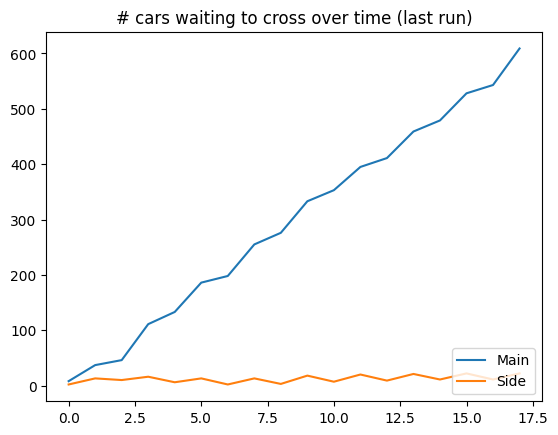

In [ ]:
import importlib.util

simulator_path = '/content/drive/MyDrive/MT2/trafficSimulator.pyc'

spec = importlib.util.spec_from_file_location("trafficSimulator", simulator_path)
simulator = importlib.util.module_from_spec(spec)
spec.loader.exec_module(simulator)

num_cars_on_main, num_cars_on_side, wait_times_main, wait_times_side = trafficSimulator.simulate(fis_simulator, verbose = False)

print("Mean waiting time - main street", np.mean(wait_times_main))
print("Mean waiting time - side street", np.mean(wait_times_side))
plt.plot(num_cars_on_main)
plt.plot(num_cars_on_side)
plt.legend(["Main", "Side"], loc="lower right")
plt.title("# cars waiting to cross over time")
plt.show()

In [ ]:
!ls /content/drive/MyDrive/MT2


MT2_Student.ipynb  trafficSimulator.pyc


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
